El nodo con el desplazamiento maximo es:  [17 17 18 18]
El combo con el desplazamiento maximo es:  [ 2 10  2 10]
El nodo con el desplazamiento minimo es:  [ 7  7 19 19]
El combo con el desplazamiento minimo es:  [ 3 11  3 11]
El nodo con el esfuerzo maximo es:  [17 17 18 18]
El combo con el esfuerzo maximo es:  [ 2 10  2 10]
El nodo con el esfuerzo minimo es:  [ 7  7 19 19]
El combo con el esfuerzo minimo es:  [ 3 11  3 11]

Desplazamientos: 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
128,0.001,0.000,0.001,0.000,0.001,0.0,0.001,0.000,0.000,0.000,0.001,0.000,0.0
129,0.001,0.000,0.002,-0.001,0.001,0.0,0.001,-0.001,0.001,0.000,0.001,-0.001,0.0
130,0.001,0.000,0.003,-0.002,0.001,0.0,0.002,-0.001,0.001,-0.001,0.003,-0.002,0.0



 Valores de qs: 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
128,4.75,0.00,4.75,0.00,4.75,0.0,4.75,0.00,0.00,0.00,4.75,0.00,0.0
129,4.75,0.00,9.50,-4.75,4.75,0.0,4.75,-4.75,4.75,0.00,4.75,-4.75,0.0
130,4.75,0.00,14.25,-9.50,4.75,0.0,9.50,-4.75,4.75,-4.75,14.25,-9.50,0.0



Desplazamientos por nodo


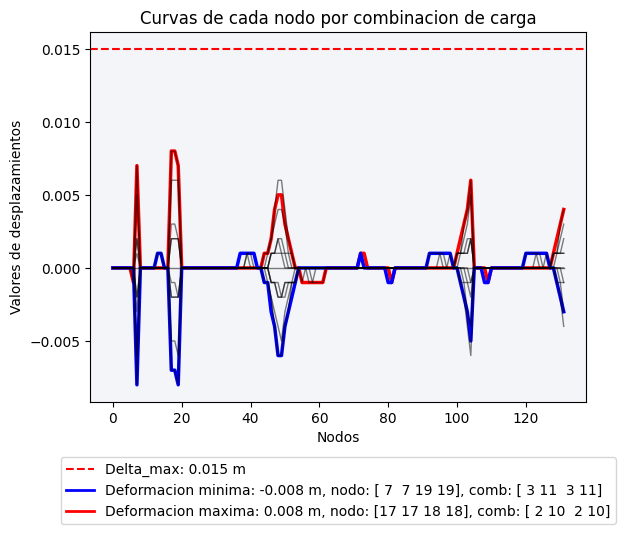


Valores de qs


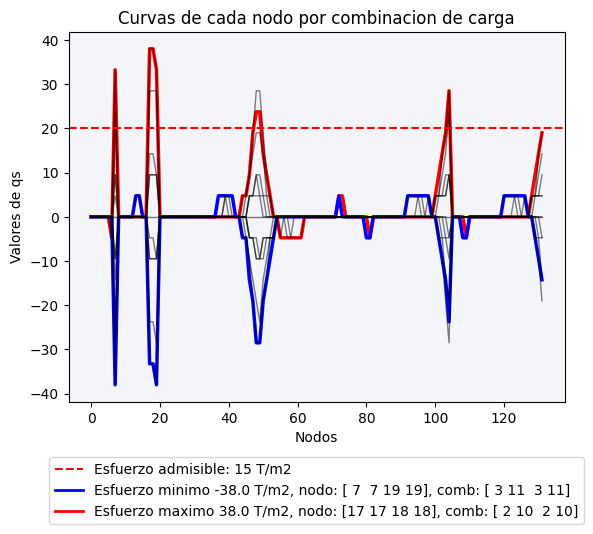

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





#Variables
B = 4750 # [T/m^3]
qa = 15  # [T/m^2]
delta_max = 0.015   #m
comb = 13
nodes = 232

#Importación de datos  (Con balasto = 4750)
Uxyz = pd.read_excel(r'C:\Users\USUARIO\Desktop\Python\Jupyter\Cimentaciones\Cimentaciones\Datos_exportados_Robot_b4750.xlsx', sheet_name='Hoja1')
Uz = Uxyz.iloc[1:, 4].values.astype(float)
n = (len(Uz) // comb) * comb
Uz = Uz[:n]
#print(Uz.shape)

n_filas_D = len(Uz) // comb
n_columnas_D = comb
D = np.empty((n_filas_D, n_columnas_D))
qs = np.empty((n_filas_D, n_columnas_D))
#print(D.shape)

for j in range(0, comb):
    D[:,j] = Uz[j::comb]
    qs[:,j] = D[:,j]*B      #balasto = 4750 T/m3


D_max = np.max(D)
qs_max = np.max(qs)

D_min = np.min(D)
qs_min = np.min(qs)

val_desplazamiento_max = np.where(D == D_max)
val_desplazamiento_min = np.where(D == D_min)

val_esfuerzo_max = np.where(qs == qs_max)
val_esfuerzo_min = np.where(qs == qs_min)

nod_despMax = val_desplazamiento_max[0]
comb_despMax = val_desplazamiento_max[1]
nod_despMin = val_desplazamiento_min[0]
comb_despMin = val_desplazamiento_min[1]

nod_esfMax = val_esfuerzo_max[0]
comb_esfMax = val_esfuerzo_max[1]
nod_esfMin = val_esfuerzo_min[0]
comb_esfMin = val_esfuerzo_min[1]


print('El nodo con el desplazamiento maximo es: ', nod_despMax)
print('El combo con el desplazamiento maximo es: ', comb_despMax)
print('El nodo con el desplazamiento minimo es: ', nod_despMin)
print('El combo con el desplazamiento minimo es: ', comb_despMin)
print('El nodo con el esfuerzo maximo es: ', nod_esfMax)
print('El combo con el esfuerzo maximo es: ', comb_esfMax)
print('El nodo con el esfuerzo minimo es: ', nod_esfMin)
print('El combo con el esfuerzo minimo es: ', comb_esfMin)


df_D = pd.DataFrame(D)
df_qs = pd.DataFrame(qs)
print(f'\nDesplazamientos: ')
display(df_D)
print(f'\n Valores de qs: ')
display(df_qs)


#Create plot for displacements
print(f'\nDesplazamientos por nodo')
fig, ax = plt.subplots()
ax.set_facecolor('#F4F5F8')

for i in range(0, comb):
    if i == comb_despMax[0]:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='red', linewidth=2.5, alpha=1)
    elif  i == comb_despMin[0]:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='blue', linewidth=2.5, alpha=1)
    else:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='black', linewidth=1, alpha=0.5)


Deformacion_max = ax.axhline(y=delta_max, color='r', linestyle='--', label=f'Delta_max: {delta_max} m')

# Add the legend outside the graph
Deformacion_max_2 = ax.plot([], [], color='red', linewidth=2, label=f'Deformacion maxima: {D_max} m, nodo: {nod_despMax}, comb: {comb_despMax}')
Deformacion_min = ax.plot([], [], color='blue', linewidth=2, label=f'Deformacion minima: {D_min} m, nodo: {nod_despMin}, comb: {comb_despMin}')
ax.legend(handles=[Deformacion_max, Deformacion_min[0], Deformacion_max_2[0]],  loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=1)

ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de desplazamientos")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()


#create plot for strain
print(f'\nValores de qs')
fig, ax = plt.subplots()
ax.set_facecolor('#F4F5F8')

for i in range(0, comb):
    if i == comb_esfMax[0]:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='red', linewidth=2.5, alpha=1)
    elif  i == comb_despMin[0]:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='blue', linewidth=2.5, alpha=1)
    else:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='black', linewidth=1, alpha=0.5)


esfuerzo_max = ax.axhline(y=20, color='r', linestyle='--', label=f'Esfuerzo admisible: {qa} T/m2')

# Add the legend outside the graph
esfuerzo_max_2 = ax.plot([], [], color='red', linewidth=2, label=f'Esfuerzo maximo {qs_max} T/m2, nodo: {nod_esfMax}, comb: {comb_esfMax}')
esfuerzo_min = ax.plot([], [], color='blue', linewidth=2, label=f'Esfuerzo minimo {qs_min} T/m2, nodo: {nod_esfMin}, comb: {comb_esfMin}')
ax.legend(handles=[esfuerzo_max, esfuerzo_min[0], esfuerzo_max_2[0]], loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=1)


ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de qs")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()
